In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
folder_path = "/content/drive/MyDrive/ZeoTap/"

In [5]:
customers = pd.read_csv(folder_path + "Customers.csv")
products = pd.read_csv(folder_path + "Products.csv")
transactions = pd.read_csv(folder_path + "Transactions.csv")

In [6]:
print(customers.head(), products.head(), transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [7]:
#finding missing and deblicate values if any
print(customers.isnull().sum(), "\n")
print(products.isnull().sum(), "\n")
print(transactions.isnull().sum(), "\n")

print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 

Customers: 0
Products: 0
Transactions: 0


In [8]:
#Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [9]:
# Merge datasets for deeper insights
merged_data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')
print("\nMerged Dataset Sample:")
print(merged_data.head())


Merged Dataset Sample:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluet

In [10]:
import seaborn as sns

In [11]:
# Exploratory Data Analysis (EDA)
## 1. Customer Demographics
print("\nCustomer Demographics Analysis:")
print(customers.describe(include='all'))


Customer Demographics Analysis:
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00



Product Price Distribution:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


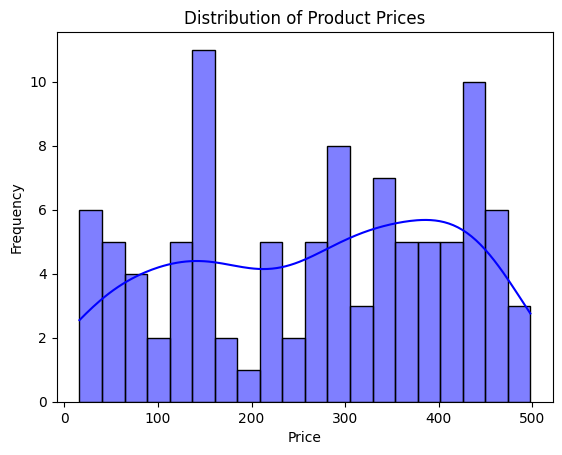

In [14]:
print("\nProduct Price Distribution:")
print(products.describe())
sns.histplot(products['Price'], bins=20, kde=True, color='blue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [15]:
# 5 top and least expensive products
print("\nTop 5 Most Expensive Products:")
print(products.nlargest(5, 'Price'))
print("\nTop 5 Least Expensive Products:")
print(products.nsmallest(5, 'Price'))


Top 5 Most Expensive Products:
   ProductID           ProductName     Category   Price
74      P075      TechPro Textbook        Books  497.76
31      P032    BookWorld Cookbook        Books  488.63
44      P045     SoundWave T-Shirt     Clothing  481.78
16      P017   ActiveWear Textbook        Books  469.77
36      P037  SoundWave Smartwatch  Electronics  459.86

Top 5 Least Expensive Products:
   ProductID               ProductName     Category  Price
55      P056      SoundWave Smartwatch  Electronics  16.08
43      P044  ActiveWear Running Shoes     Clothing  18.82
13      P014         ActiveWear Jacket     Clothing  26.26
72      P073      ComfortLiving Laptop  Electronics  26.99
34      P035        ActiveWear T-Shirt     Clothing  30.59


Top 10 Popular Products:
   ProductID  Quantity
58      P059        46
53      P054        46
28      P029        45
78      P079        43
60      P061        43
56      P057        43
47      P048        43
61      P062        39
19      P020        38
27      P028        38


<ipython-input-27-8fb82084f3b7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popular_products.head(10), x='ProductID', y='Quantity', palette='coolwarm')


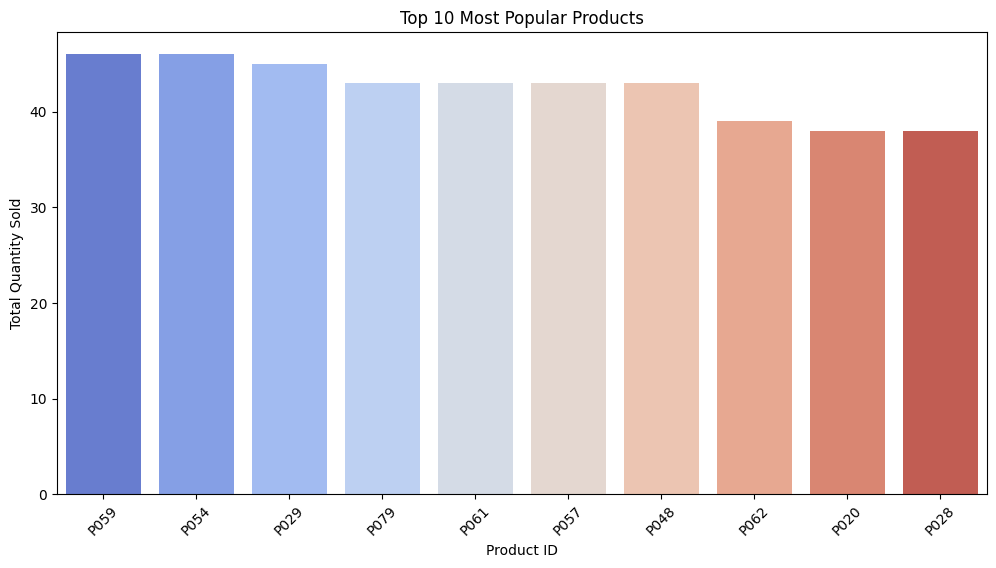

In [27]:
# Identify most popular products based on total quantity sold
popular_products = merged_data.groupby('ProductID')['Quantity'].sum().reset_index()
popular_products = popular_products.sort_values(by='Quantity', ascending=False)

# Display top 10 popular products
print("Top 10 Popular Products:")
print(popular_products.head(10))

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=popular_products.head(10), x='ProductID', y='Quantity', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 10 Most Popular Products")
plt.xlabel("Product ID")
plt.ylabel("Total Quantity Sold")
plt.show()


In [16]:
## 3. Transaction Analysis
print("\nTransaction Summary:")
print(transactions.describe())


Transaction Summary:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639


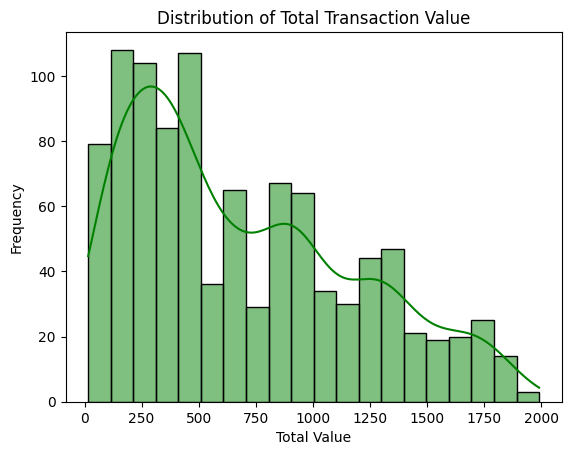

In [17]:
# Analyze TotalValue Distribution
sns.histplot(transactions['TotalValue'], bins=20, kde=True, color='green')
plt.title('Distribution of Total Transaction Value')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Transaction Trends by Month
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('TransactionMonth')['TotalValue'].sum()


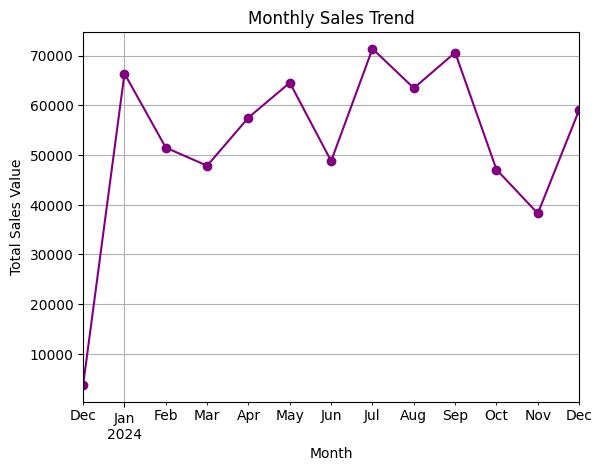

In [19]:
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.grid(True)
plt.show()


In [20]:
## 4. Customer Spending Patterns
print("\nTop 5 Customers by Spending:")
merged_data['Revenue'] = merged_data['Quantity'] * merged_data['Price_x']
customer_spending = merged_data.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head()
print(customer_spending)


Top 5 Customers by Spending:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: Revenue, dtype: float64


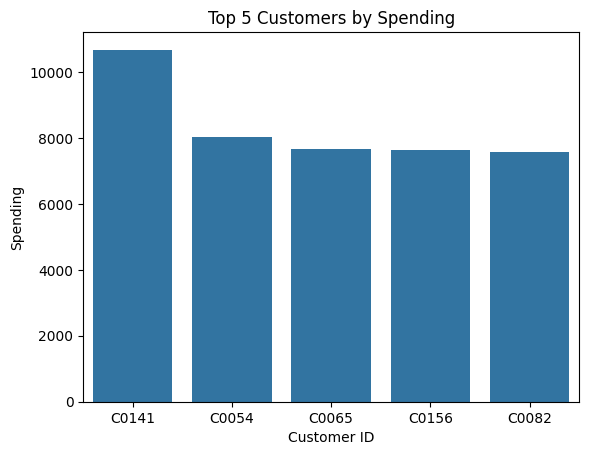

In [21]:
sns.barplot(x=customer_spending.index.astype(str), y=customer_spending.values)
plt.title('Top 5 Customers by Spending')
plt.xlabel('Customer ID')
plt.ylabel('Spending')
plt.show()
